<font size="6"><strong>Career Booster Python & Data Science</font></strong><br /><br />
<font size="6">Session 3</font><br /><br />
Jeudi 7 Novembre 2019 <br /><br />

Pandas

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import json
from typing import Dict, List, Tuple, NoReturn 

In [8]:
variable = 'r'
float(variable)

ValueError: could not convert string to float: 'r'

In [2]:
def initializeDataset(json):
    ds = {}
    keys = json.keys()
    for iKey in keys:
        ds[iKey] = []
    return ds, keys

def readJson(file):
    dataset = {}
    keys = []
    with open(file, encoding='utf-8') as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count == 0:
                dataset, keys = initializeDataset(data)
            for iKey in keys:
                dataset[iKey].append(data[iKey])
        return pd.DataFrame(dataset)

In [4]:
path_name = '../Data/yelp-dataset/'
yelp_tips = readJson(path_name + 'tip.json')
yelp_review = readJson(path_name + 'review.json')
yelp_business = readJson(path_name + 'business.json')

In [5]:
yelp_review['date'] = pd.to_datetime(yelp_review['date'], format='%Y-%m-%d')
yelp_review['year'] = yelp_review.date.dt.year

Avant d'effectuer quelque opération ou analyse que ce soit sur un jeu de données, il est indispensable de jeter un rapide coup d'oeil sur ce que ces données contiennent.

In [157]:
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,2013
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,2017
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,2016
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,2018
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,2018


Ici, nous pouvons voir que le fichier 'review' consiste en:
- un id
- l'id de l'utilisateur qui a laissé le commentaire
- l'id du business concerné par le commentaire
- le nombre d'étoiles laissé
- ...<br /><br />
Savoir quelles sont les descripteurs présents dans notre jeu de données permet de savoir lesquels nous allons pouvoir supprimer afin d'alléger le jeu de données.
Par exemple, dans le jeu de données 'business', est-il utile de conserver l'adresse du business lorsque nous avons les coordonnées GPS également ? (ou vice-versa)

Ensuite, explorer les variables une à une :

In [158]:
useful_reviews = len(yelp_review[yelp_review["useful"]>0])
cool_reviews = len(yelp_review[yelp_review["cool"]>0])
funny_reviews = len(yelp_review[yelp_review["funny"]>0])
negative_reviews = len(yelp_review[yelp_review["stars"]<2])
positive_reviews =len(yelp_review[yelp_review["stars"]>3])
total_reviews = len(yelp_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviews))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 6685900
Useful reviews: 3115446
Funny reviews: 1373727
Cool reviews: 1672612
Total negative reviews: 1002159
Total positive reviews: 4402067


In [17]:
median_stars = np.median(yelp_review['stars'])
print(median_stars)

4.0


In [141]:
negative_reviews = len(yelp_review[yelp_review["stars"] < median_stars])
positive_reviews =len(yelp_review[yelp_review["stars"] >= median_stars])
print("Total negative reviews: {}".format(negative_reviews))
print("Total positive reviews: {}".format(positive_reviews))

Total negative reviews: 2283833
Total positive reviews: 4402067


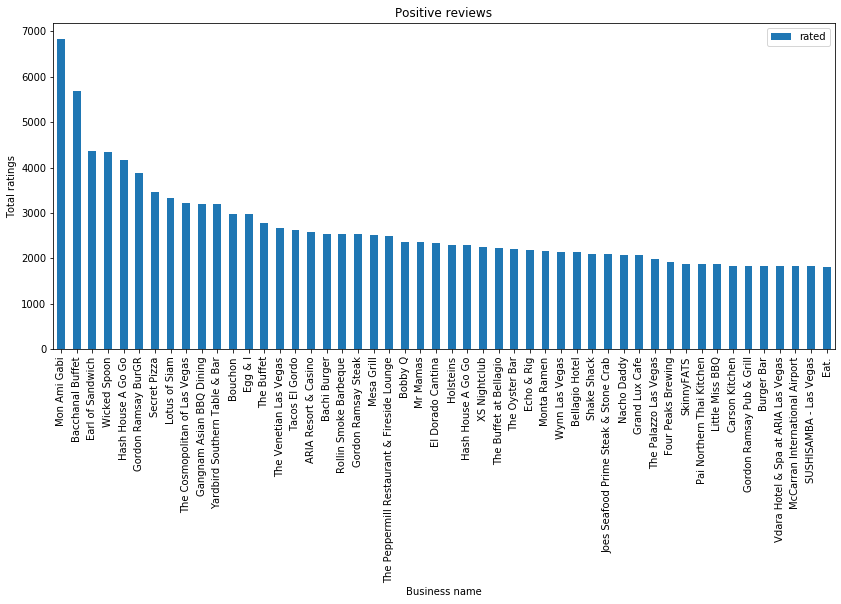

In [159]:
top_reviewed = yelp_review[yelp_review["stars"] >= median_stars]
top_reviews_dict = {}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] += 1
    except:
        top_reviews_dict[business_id] = 1
        
topbusiness = pd.DataFrame.from_dict(data=top_reviews_dict, orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)

top_count = 50
right = pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                      columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

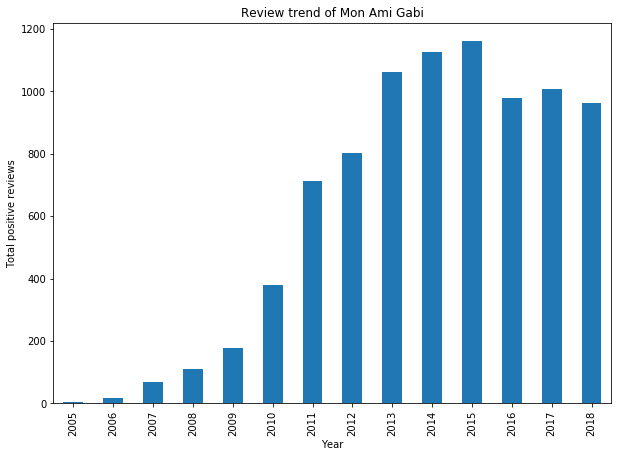

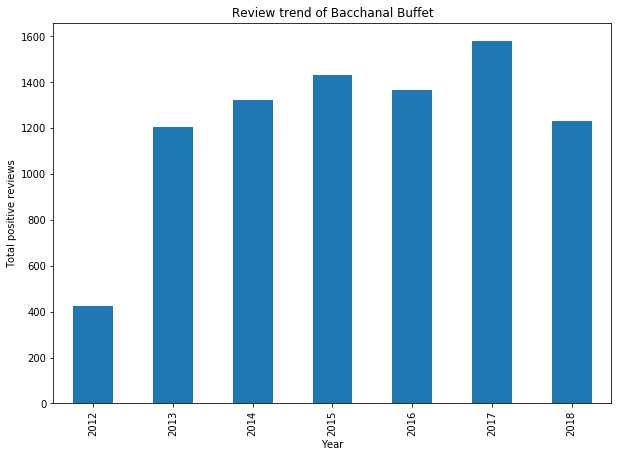

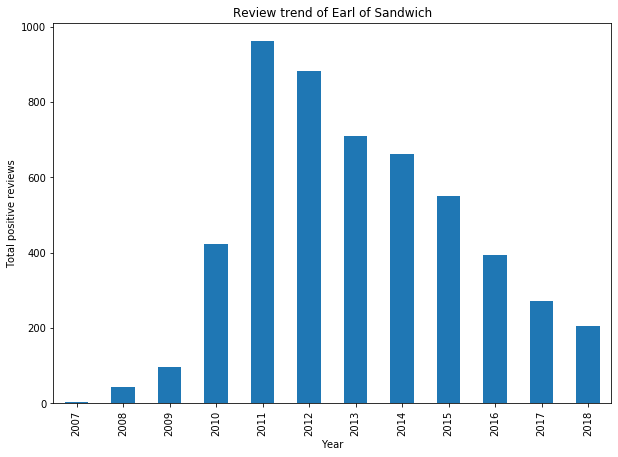

In [160]:
num_business = 3
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = top_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values
for i, business_id in enumerate(business_ids):
    useful_b = yelp_review.loc[yelp_review['business_id'] == business_id]
    useful_b = useful_b.groupby(['year']).size().reset_index(name='counts')
    #print(useful_b.head())
    series = pd.Series(useful_b["counts"].values, index=useful_b["year"].values, name='Review trend')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    plt.show()

In [37]:
yelp_business['state'].describe()

count     192609
unique        36
top           AZ
freq       56686
Name: state, dtype: object

In [39]:
yelp_review.describe()

,stars,useful,funny,cool,year
count,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06
mean,3.716199e+00,1.354134e+00,4.827667e-01,5.787708e-01,2.015134e+03
std,1.463643e+00,3.700192e+00,2.378646e+00,2.359024e+00,2.454348e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,2.004000e+03
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.017000e+03
max,5.000000e+00,1.241000e+03,1.290000e+03,5.060000e+02,2.018000e+03


In [164]:
yelp_business.describe()

,latitude,longitude,stars,review_count,is_open
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,38.541803,-97.594785,3.585627,33.538962,0.823040
std,4.941964,16.697725,1.018458,110.135224,0.381635
min,33.204642,-115.493471,1.000000,3.000000,0.000000
25%,33.637408,-112.274677,3.000000,4.000000,1.000000
50%,36.144815,-111.759323,3.500000,9.000000,1.000000
75%,43.602989,-79.983614,4.500000,25.000000,1.000000
max,51.299943,-72.911982,5.000000,8348.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x242990a95f8>,
 'caps': [<matplotlib.lines.Line2D at 0x242990a96d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x242c14f97f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2426a58ceb8>],
 'fliers': [],
 'means': []}

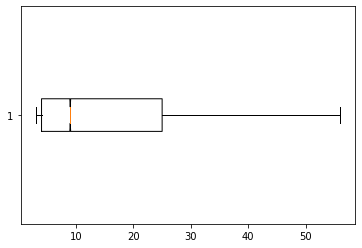

In [170]:
fig, ax = plt.subplots(1, 1)
ax.boxplot(yelp_business['review_count'], notch=True, vert=False, showfliers=False)
#N, bins, patches = plt.hist(yelp_business['state'], bins=36)

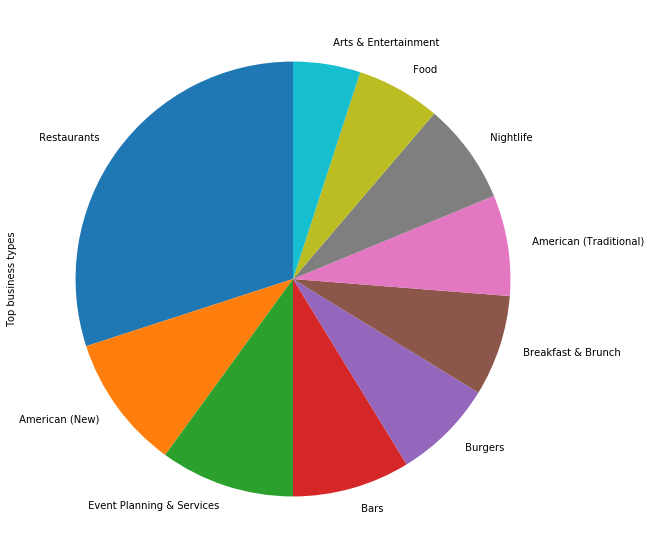

In [171]:
num_cat =10 # to show top 10 catrgories
top_business = 30 # choose categories of top 30 businesses
cat_data = top_business_data.sort_values("rated")[::-1][:top_business]
#cat_data.categories
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90)

In [183]:
print(len(yelp_business))
open_restaurants = yelp_business[yelp_business['is_open'] == 1]
print(len(open_restaurants))

192609
158525


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


In [184]:
open_restaurants = open_restaurants[open_restaurants['state'] == 'AZ']
len(open_restaurants)

46910

In [187]:
open_restaurants.iloc[1]['categories'].lower()

business_id     xOR85RicYj642O3_iJ7hgg
name                Phoenix Valuations
address               6340 E Thomas Rd
city                        Scottsdale
state                               AZ
postal_code                      85251
latitude                       33.4804
longitude                     -111.946
stars                              3.5
review_count                         3
is_open                              1
attributes                        None
categories                        None
hours                             None
Name: 265, dtype: object

In [186]:
[iRest for iRest in range(len(open_restaurants)) if 'restaurant' in open_restaurants.iloc[iRest]['categories'].lower()]

AttributeError: 'NoneType' object has no attribute 'lower'

In [188]:
idx = []
for iRest in range(len(open_restaurants)):
    if not open_restaurants.iloc[iRest]['categories'] is None:
        if 'restaurant' in open_restaurants.iloc[iRest]['categories'].lower():
            idx.append(iRest)

In [189]:
open_restaurants_az = open_restaurants.iloc[idx]

In [195]:
open_restaurants_az.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
78,44YFU284Z3KDEy25QyVoUw,Nee House Chinese Restaurant,"13843 N Tatum Blvd, Ste 15",Phoenix,AZ,85032,33.613020,-111.977036,3.5,269,1,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...","Chinese, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
133,ysfeDcLAYk_MVzfBmyiSTg,Vals Getaway DES Cafeteria,1789 W Jefferson,Phoenix,AZ,85007,33.446806,-112.097129,3.0,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Food, Cafes",None
162,nsNONDHbV7Vudqh21uicqw,Salt Cellar,550 N Hayden Rd,Scottsdale,AZ,85257,33.454286,-111.909405,3.5,526,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Seafood, Restaurants","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
181,Rs8Wi4OEjeOX7LVlzsXDOA,Sushi Mocorito,"3415 West Glendale Ave, Bldg 25A",Phoenix,AZ,85051,33.537164,-112.132926,3.0,9,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Restaurants, Mexican, Sushi Bars","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
187,MhnihE0alud0ereVInSt8Q,Yummy Yummy Chinese Restaurant,"2765 N Scottsdale Rd, Ste 105",Scottsdale,AZ,85257,33.478754,-111.925484,3.0,188,1,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Chinese, Restaurants","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
273,dUffgo9Lh_Vk9TLuFR5ywg,Oregano's Pizza Bistro,1008 E Camelback Rd,Phoenix,AZ,85014,33.509510,-112.060238,3.5,563,1,"{'Alcohol': 'u'full_bar'', 'RestaurantsAttire'...","Restaurants, Pizza, Sandwiches, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
276,c7JoAt6a3Ufkpn3TrGU23A,Santanas Mexican Food,1930 W Buckeye Rd,Phoenix,AZ,85009,33.436984,-112.101267,3.0,6,1,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...","Mexican, Restaurants",None
298,vg4ynLZ0yJ89pT4s_CEMzQ,Five Guys,2340 E Baseline Rd,Phoenix,AZ,85042,33.378699,-112.031013,3.5,23,1,"{'RestaurantsReservations': 'False', 'Restaura...","Fast Food, Restaurants, Burgers, Food","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
302,e-9f6vasnWh3z0uOq287Aw,Pizza Hut,"2835 N 16th St, Ste 103",Phoenix,AZ,85006,33.479506,-112.046931,2.0,14,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Italian, Pizza, Fast Food, Chicke...",None


In [126]:
review_restaurants = yelp_review[yelp_review.business_id.isin(open_restaurants_az.business_id)]

In [127]:
len(review_restaurants)

1013463

In [138]:
review_restaurants.head()
open_restaurants_az.loc[open_restaurants_az['business_id'] == review_restaurants.iloc[4]['business_id']]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
16973,3JxKzWquEbPC3yPIfoCiLw,Eest Asian Bistro,"3145 N Dysart Rd, Ste C102",Avondale,AZ,85392,33.481101,-112.339392,4.0,148,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Asian Fusion","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."


In [145]:
review_restaurants['business_id'].values

array(['mRUVMJkUGxrByzMQ2MuOpA', 'cHdJXLlKNWixBXpDwEGb_A',
       '6lj2BJ4tJeu7db5asGHQ4w', ..., 'mFTSdfJOv4X5t8LeeY4nJw',
       'CRVtzesMuwHK-phmS_ojaA', 'yA6dKNm_zl1ucZCnwW8ZCg'], dtype=object)

"I have to say that this office really has it together, they are so organized and friendly!  Dr. J. Phillipp is a great dentist, very friendly and professional.  The dental assistants that helped in my procedure were amazing, Jewel and Bailey helped me to feel comfortable!  I don't have dental insurance, but they have this insurance through their office you can purchase for $80 something a year and this gave me 25% off all of my dental work, plus they helped me get signed up for care credit which I knew nothing about before this visit!  I highly recommend this office for the nice synergy the whole office has!"